### Colours and Reflection

We will determine the colour of some common materials upon exposure to solar radiation; i.e. what wavelengths do these materials reflect and which do they absorb?

In [ ]:
import numpy as np

#### Reflection coefficients

The reflected power is given by $|E_{0r}|^2/|E_{0i}|^2 = |\rho|^2$; the transmitted power is not as simple but this will be discussed in the online lectures.

Define function for the reflection coefficient _normal_ to the interface.

In [ ]:
def reflection(n1_real, n1_imag, n2_real, n2_imag):
    
    return reflection

Define a function to calculate the reflected power.

In [ ]:
def reflected_power(n1_real, n1_imag, n2_real, n2_imag):
            
    return power

Define function to calculate reflected power after passing through a given thickness of material.

In [ ]:
def refleacted_leaf(n1_real, n1_imag, n2_real, n2_imag, thickness):
    
    # calculated reflected and trasmitted power at first interface

    # calculate power lost by wave propagating through leaf

    # calculate power reflected at second interface

    # calculate power lost by wave propagating through leaf

    # calculate the fraction of this power that escapes
    
    return reflected

#### Example material - Chlorophyll

The refractive index of Chlorophyll is shown in the following plot as a function of (vacuum) wavelength:

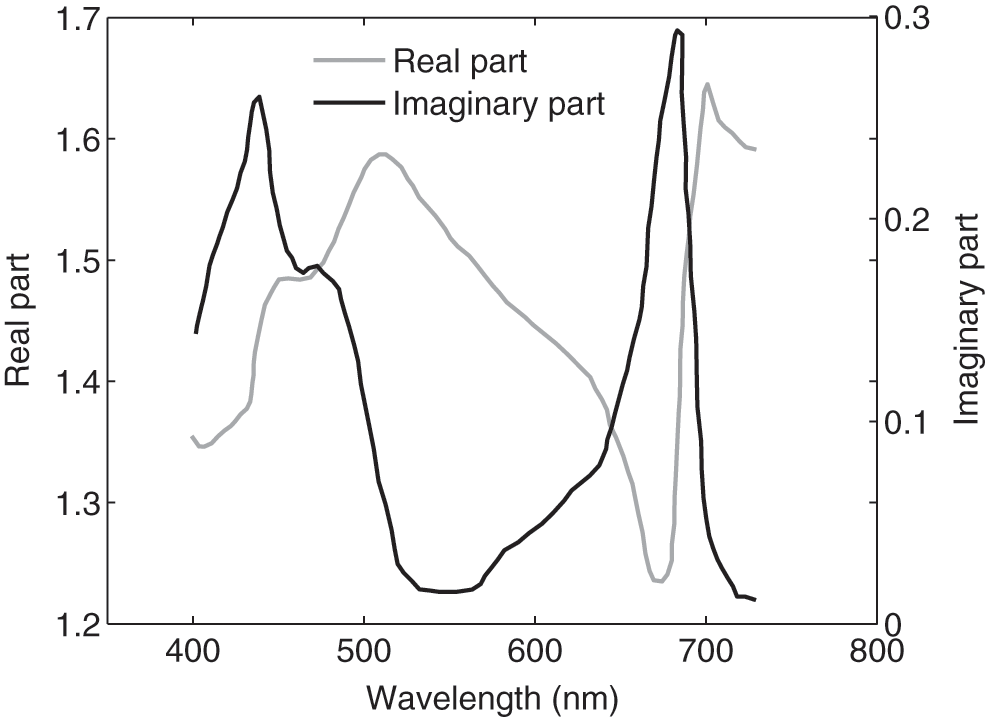

Fit a cubic spline (approximately) to both the real and imaginary components of the refractive index.

First, provide lists of values at critical points.

In [ ]:
wavelength_real = [400, 415, 430, 450, 470, 510, 550, 600, 630, 650, 670, 685, 690, 700, 710, 720, 730]
refractive_real = [1.35, 1.35, 1.38, 1.48, 1.48, 1.58, 1.51, 1.45, 1.4, 1.32, 1.23, 1.4, 1.5, 1.65, 1.6, 1.59, 1.59]
wavelength_imag = [400, 435, 460, 470, 485, 530, 565, 580, 635, 660, 680, 685, 690, 695, 700, 710, 720, 725, 730]
refractive_imag = [0.14, 0.25, 0.17, 0.17, 0.16, 0.02, 0.02, 0.04, 0.08, 0.15, 0.25, 0.29, 0.2, 0.1, 0.04, 0.03, 0.02, 0.015, 0.015]

Second, fit these critical points with a cubic spline.

In [ ]:
from scipy.interpolate import interp1d
f_real = interp1d(wavelength_real, refractive_real, kind='cubic')
f_imag = interp1d(wavelength_imag, refractive_imag, kind='cubic')

Third, create a list of wavelengths to use in a plot.

Plot the cubic spline fits to ensure they are representative of the actual data.

In [ ]:
from matplotlib import pyplot as plt
from matplotlib import rc

# set up latex labels on plot (optional)
try:
    rc('text', usetex=True) # can try usetex=False
    rc('font', size=14)
    rc('legend', fontsize=14)
    rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
except:
    pass

# create figure
fig, ax = plt.subplots(figsize=(7, 7))

# set axis labels
ax.set_xlabel(r'Wavelength (nm)')
ax.set_ylabel(r'Refractive index (real)')
ax2 = ax.twinx()
ax2.set_ylabel(r'Refractive index (imag)')

ax.plot(wavelength, f_real(wavelength), c='grey', label='real')
ax2.plot(wavelength, f_imag(wavelength), c='black', label='imag')

plt.show()

#### Reflectance of a leaf

Define set of wavelengths to calculate reflected power between 400 and 700 nm.

Find reflected power for leaf of thickness $235 \mu m$ as a function of wavelength.

Create a plot of the reflected light versus wavelength.

In [ ]:
from matplotlib import pyplot as plt
from matplotlib import rc

# set up latex labels on plot (optional)
try:
    rc('text', usetex=True) # can try usetex=False
    rc('font', size=14)
    rc('legend', fontsize=14)
    rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
except:
    pass

# create figure
fig, ax = plt.subplots(figsize=(7, 7))

# set axis labels
ax.set_xlabel(r'Wavelength (nm)')
ax.set_ylabel(r'Reflected power')

ax.plot(wavelength, reflectance, c='green')

plt.show()

Define function to find mean wavelength, weighted by the reflected power. Could consider weighting by based on the response of the human eye which is not linear - e.g. more sensitive to green, then red and least to blue.

Define function to print text in colour corresponding to wavelength.

In [ ]:
def wavelength_to_text(text, nm, avg_power=1):
    
    # get rgb colour for this wavelength
    rgb = wavelength_to_rgb(nm, avg_power)
    # print text in correct colour
    print('\033[38;2;{};{};{}m {} \033[0;0m'.format(rgb[0], rgb[1], rgb[2], text))


# function from visiblespectrum.py  
def wavelength_to_rgb(nm, avg_power):

    gamma = 0.8
    max_intensity = 255
    factor = 0

    rgb = {"R": 0, "G": 0, "B": 0}

    if 380 <= nm <= 439:
        rgb["R"] = -(nm - 440) / (440 - 380)
        rgb["G"] = 0.0
        rgb["B"] = 1.0
    elif 440 <= nm <= 489:
        rgb["R"] = 0.0
        rgb["G"] = (nm - 440) / (490 - 440)
        rgb["B"] = 1.0
    elif 490 <= nm <= 509:
        rgb["R"] = 0.0
        rgb["G"] = 1.0
        rgb["B"] = -(nm - 510) / (510 - 490)
    elif 510 <= nm <= 579:
        rgb["R"] = (nm - 510) / (580 - 510)
        rgb["G"] = 1.0
        rgb["B"] = 0.0
    elif 580 <= nm <= 644:
        rgb["R"] = 1.0
        rgb["G"] = -(nm - 645) / (645 - 580)
        rgb["B"] = 0.0
    elif 645 <= nm <= 780:
        rgb["R"] = 1.0
        rgb["G"] = 0.0
        rgb["B"] = 0.0

    if 380 <= nm <= 419:
        factor = 0.3 + 0.7 * (nm - 380) / (420 - 380)
    elif 420 <= nm <= 700:
        factor = 1.0
    elif 701 <= nm <= 780:
        factor = 0.3 + 0.7 * (780 - nm) / (780 - 700)

    if rgb["R"] > 0:
        rgb["R"] = int(max_intensity * avg_power**(1/2.4) * ((rgb["R"] * factor) ** gamma))
    else:
        rgb["R"] = 0

    if rgb["G"] > 0:
        rgb["G"] = int(max_intensity * avg_power**(1/2.4) * ((rgb["G"] * factor) ** gamma))
    else:
        rgb["G"] = 0

    if rgb["B"] > 0:
        rgb["B"] = int(max_intensity * avg_power**(1/2.4) * ((rgb["B"] * factor) ** gamma))
    else:
        rgb["B"] = 0

    return (rgb["R"], rgb["G"], rgb["B"])

Print some text in the colour of a leaf, if 100% light reflected!

In [ ]:
wavelength_to_text('This is the colour of a leaf!', weighted_mean)

Print text dimmed down assuming only 5-6% of light is reflected.

In [ ]:
wavelength_to_text('This is the colour of a leaf!', weighted_mean, avg_power=0.06)